In [87]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense 

In [88]:
dataset = pd.read_csv('data_cancer.csv',sep=',')
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [89]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [90]:
dataset.drop(["Unnamed: 32","id"],axis=1,inplace=True) #kolom dengan nama unamed tidak digunakan karena hanya berisikan Not a Number

In [91]:
dataset.diagnosis.replace(('B', 'M'), (1, 0), inplace=True)

In [92]:
x=dataset.iloc[:, 1:32].values
y=dataset.iloc[:, 0].values

In [93]:
ss = StandardScaler() 
scaler = ss.fit_transform(x) 
fa = FactorAnalysis(n_components= 2) 
fa.fit(scaler,y) 
X_reduced_fa = fa.transform(scaler) 
x_reduced= fa.fit_transform(scaler,y)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 
X_train = fa.fit_transform(X_train,y_train)
X_test = fa.transform(X_test)

In [95]:
modelSeq = Sequential() 
modelSeq.add(Dense(10, input_dim=2,activation='softmax')) 
modelSeq.add(Dense(20, activation='softmax')) 
modelSeq.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 
history=modelSeq.fit(X_train, y_train,epochs=100, validation_data=(X_test,y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 0s 186us/step - loss: 3.0003 - accuracy: 0.0000e+00 - val_loss: 2.9585 - val_accuracy: 0.0994
Epoch 2/100
398/398 [==============================] - 0s 43us/step - loss: 2.9306 - accuracy: 0.4523 - val_loss: 2.8891 - val_accuracy: 0.6257
Epoch 3/100
398/398 [==============================] - 0s 48us/step - loss: 2.8618 - accuracy: 0.6231 - val_loss: 2.8208 - val_accuracy: 0.6316
Epoch 4/100
398/398 [==============================] - 0s 43us/step - loss: 2.7943 - accuracy: 0.6256 - val_loss: 2.7538 - val_accuracy: 0.6316
Epoch 5/100
398/398 [==============================] - 0s 45us/step - loss: 2.7280 - accuracy: 0.6256 - val_loss: 2.6879 - val_accuracy: 0.6316
Epoch 6/100
398/398 [==============================] - 0s 50us/step - loss: 2.6628 - accuracy: 0.6256 - val_loss: 2.6234 - val_accuracy: 0.6316
Epoch 7/100
398/398 [==============================] - 0s 50us/step - loss: 2.5990 - 

In [96]:
pred_ANN = modelSeq.predict(X_test) 
seqEvaluate=modelSeq.evaluate(X_test,y_test)[1] 
print("PCA - Neural Network Accuracy = {0:.2f}%".format(seqEvaluate*100)) 

171/171 [==============================] - 0s 29us/step
PCA - Neural Network Accuracy = 63.16%


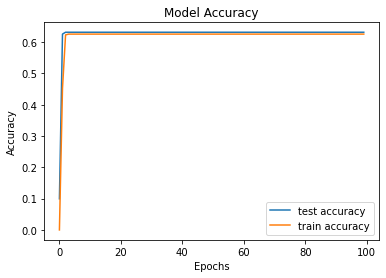

In [97]:
plt.title('Model Accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()